In [1]:
# wget https://github.com/ianchen06/pythonetl/raw/master/install_gcin.sh && sudo sh ./install_gcin.sh   #Linux, Ubuntu中執行顯示中文字

# Dataset 

In [1]:
import pandas as pd
df = pd.read_csv("iris.csv", encoding = "big5")
df.head()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.shape  #筆數,欄位  len(df)

(150, 5)

In [3]:
df.corr()  #各欄位相關,維度高先FA

,花萼長度,花萼寬度,花瓣長度,花瓣寬度
花萼長度,1.000000,-0.109369,0.871754,0.817954
花萼寬度,-0.109369,1.000000,-0.420516,-0.356544
花瓣長度,0.871754,-0.420516,1.000000,0.962757
花瓣寬度,0.817954,-0.356544,0.962757,1.000000


# Sigmoid Function

In [5]:
import numpy as np

def sigmoid(L):
    return 1/(1 + np.exp(-L))  #np.exp

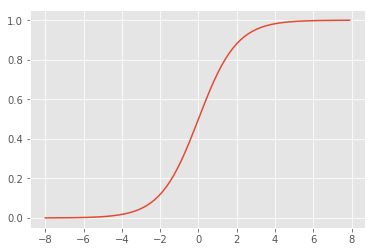

In [6]:
#sigmoid曲線
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

L = np.arange(-8,8,0.1)  #x-axis
P = sigmoid(L)  #y-axis
plt.plot(L,P)
plt.show()

# train, test (X,y)

In [16]:
from sklearn.model_selection import train_test_split  #先在prompt pip install sklearn

In [17]:
X = df[['花萼長度','花萼寬度']]
X.head()

,花萼長度,花萼寬度
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [18]:
y = df[['屬種']]   #[]Series,[[]]DataFrame
type(y)
y.head()

,屬種
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [19]:
#切分資料
train_test_split(X,y, test_size = 0.3)   #先X再y, 本例資料只有150筆, 可用全部資料先跑一次

[     花萼長度  花萼寬度
 44    5.1   3.8
 80    5.5   2.4
 92    5.8   2.6
 91    6.1   3.0
 61    5.9   3.0
 63    6.1   2.9
 43    5.0   3.5
 137   6.4   3.1
 83    6.0   2.7
 36    5.5   3.5
 135   7.7   3.0
 90    5.5   2.6
 47    4.6   3.2
 136   6.3   3.4
 130   7.4   2.8
 77    6.7   3.0
 113   5.7   2.5
 107   7.3   2.9
 100   6.3   3.3
 9     4.9   3.1
 87    6.3   2.3
 51    6.4   3.2
 81    5.5   2.4
 23    5.1   3.3
 21    5.1   3.7
 60    5.0   2.0
 66    5.6   3.0
 19    5.1   3.8
 56    6.3   3.3
 41    4.5   2.3
 ..    ...   ...
 108   6.7   2.5
 37    4.9   3.1
 85    6.0   3.4
 22    4.6   3.6
 123   6.3   2.7
 30    4.8   3.1
 11    4.8   3.4
 139   6.9   3.1
 101   5.8   2.7
 84    5.4   3.0
 127   6.1   3.0
 125   7.2   3.2
 94    5.6   2.7
 145   6.7   3.0
 57    4.9   2.4
 49    5.0   3.3
 119   6.0   2.2
 28    5.2   3.4
 59    5.2   2.7
 133   6.3   2.8
 142   5.8   2.7
 71    6.1   2.8
 62    6.0   2.2
 31    5.4   3.4
 88    5.6   3.0
 4     5.0   3.6
 79    5.7   2

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)  #令為左方變數

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 2) (45, 2) (105, 1) (45, 1)


# normalize (可選擇)

In [24]:
from sklearn.preprocessing import StandardScaler

#針對X_train
sc = StandardScaler()  #開sc物件 
sc.fit(X_train)  #開始中心化
X_train_nor = sc.transform(X_train)  #標準化
X_train_nor[:10]  #二維

#針對X_test
sc.fit(X_test)
X_test_nor = sc.transform(X_test)
X_test_nor[:10]

array([[-0.22625275,  2.7339916 ],
       [-0.82515709,  0.62088741],
       [ 0.7319942 ,  0.62088741],
       [-1.06471883, -0.08348066],
       [ 0.37265159, -0.31827001],
       [-0.94493796,  0.1513087 ],
       [ 0.25287072, -0.08348066],
       [-0.82515709,  0.85567676],
       [ 1.21111767, -0.08348066],
       [-0.94493796, -1.49221679]])

# LogisticRegression

In [28]:
from sklearn.linear_model import LogisticRegression  

#針對train
lr = LogisticRegression()  #開logistic regression物件
lr.fit(X_train_nor, y_train)  #開始建立預測式
pred_y = lr.predict(X_train_nor)  #predict類別
pred_y   #存成array,直接是類別名

C:\Users\user\Anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virgin

# Classification - train

In [30]:
X_train_nor[i]

array([-0.87354953,  0.77803372])

In [32]:
X_train_nor[i].reshape(1,-1)  #每一筆資料先reshape

array([[-0.87354953,  0.77803372]])

In [33]:
lr.predict(X_train_nor[i].reshape(1,-1))

array(['Iris-setosa'], dtype=object)

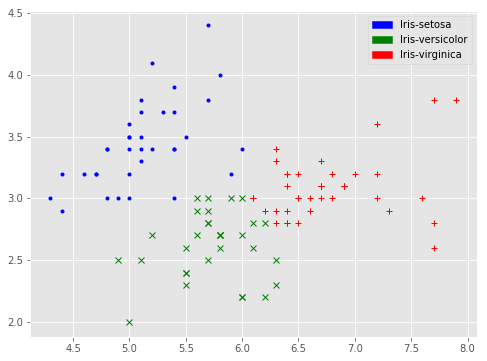

In [29]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

plt.figure(figsize=(8,6)) #開畫板
#針對每筆資料,要令i進來迴圈中                                              
for i in range(len(X_train_nor)):  
    if(lr.predict(X_train_nor[i].reshape(1,-1))=='Iris-setosa'):    #先reset_index整個X_train後再抓同一筆[i]進來
        plt.plot(X_train['花萼長度'].reset_index(drop=True)[i],X_train['花萼寬度'].reset_index(drop=True)[i],'b.')
    elif(lr.predict(X_train_nor[i].reshape(1,-1))=='Iris-versicolor'):
        plt.plot(X_train['花萼長度'].reset_index(drop=True)[i],X_train['花萼寬度'].reset_index(drop=True)[i],'gx')
    else:
        plt.plot(X_train['花萼長度'].reset_index(drop=True)[i],X_train['花萼寬度'].reset_index(drop=True)[i],'r+')
        
#標註
blue_patch = mpatches.Patch(color='blue', label='Iris-setosa')
green_patch = mpatches.Patch(color='green', label='Iris-versicolor')
red_patch = mpatches.Patch(color='red', label='Iris-virginica')
plt.legend(handles=[blue_patch,green_patch,red_patch])        
plt.show()

In [34]:
from sklearn.linear_model import LogisticRegression  

#針對test
lr = LogisticRegression()  
lr.fit(X_test_nor, y_test)  
pred_y = lr.predict(X_test_nor)  
pred_y   

C:\Users\user\Anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

# Classification - test

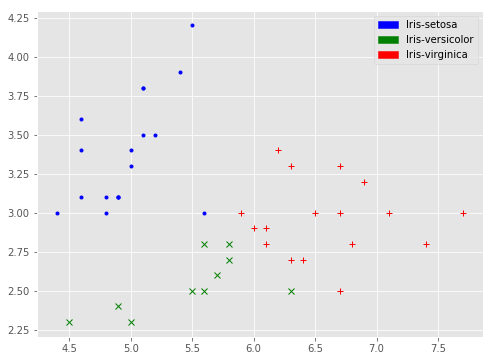

In [35]:
#使用訓練好的model進來test

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

plt.figure(figsize=(8,6))                              
for i in range(len(X_test_nor)):   
    if(lr.predict(X_test_nor[i].reshape(1,-1))=='Iris-setosa'):    
        plt.plot(X_test['花萼長度'].reset_index(drop=True)[i],X_test['花萼寬度'].reset_index(drop=True)[i],'b.')
    elif(lr.predict(X_test_nor[i].reshape(1,-1))=='Iris-versicolor'):
        plt.plot(X_test['花萼長度'].reset_index(drop=True)[i],X_test['花萼寬度'].reset_index(drop=True)[i],'gx')
    else:
        plt.plot(X_test['花萼長度'].reset_index(drop=True)[i],X_test['花萼寬度'].reset_index(drop=True)[i],'r+')
        
#標註
blue_patch = mpatches.Patch(color='blue', label='Iris-setosa')
green_patch = mpatches.Patch(color='green', label='Iris-versicolor')
red_patch = mpatches.Patch(color='red', label='Iris-virginica')
plt.legend(handles=[blue_patch,green_patch,red_patch])        
plt.show()    

In [38]:
#從上圖的分佈情形來看,以兩欄位feature分類效果可接受

# Probability

In [36]:
#計算各類別概率(test data)
import numpy as np
np.round(lr.predict_proba(X_test_nor),3)   #根據fit結果predict_proba各類別機率(multinomial reg)

array([[0.862, 0.014, 0.123],
       [0.802, 0.119, 0.079],
       [0.201, 0.204, 0.596],
       [0.729, 0.209, 0.062],
       [0.129, 0.403, 0.468],
       [0.75 , 0.178, 0.072],
       [0.225, 0.348, 0.427],
       [0.829, 0.095, 0.076],
       [0.024, 0.314, 0.662],
       [0.324, 0.576, 0.1  ],
       [0.217, 0.658, 0.125],
       [0.043, 0.327, 0.63 ],
       [0.85 , 0.03 , 0.119],
       [0.876, 0.086, 0.038],
       [0.75 , 0.178, 0.072],
       [0.004, 0.463, 0.533],
       [0.75 , 0.178, 0.072],
       [0.157, 0.46 , 0.383],
       [0.001, 0.295, 0.704],
       [0.885, 0.037, 0.078],
       [0.098, 0.398, 0.504],
       [0.797, 0.161, 0.041],
       [0.098, 0.606, 0.296],
       [0.069, 0.443, 0.489],
       [0.91 , 0.054, 0.036],
       [0.027, 0.233, 0.74 ],
       [0.836, 0.077, 0.087],
       [0.008, 0.377, 0.615],
       [0.001, 0.357, 0.642],
       [0.026, 0.456, 0.518],
       [0.769, 0.171, 0.06 ],
       [0.069, 0.202, 0.73 ],
       [0.317, 0.159, 0.524],
       [0.

# Confusion matrix    (true y, pred y)

In [39]:
#畫出混淆矩陣 (metrics module)
from sklearn.metrics import confusion_matrix  #metrics與評估有關
cnf_matrix = confusion_matrix(y_test, lr.predict(X_test_nor))   
cnf_matrix

array([[17,  1,  0],
       [ 1,  6,  6],
       [ 0,  3, 11]], dtype=int64)

# Plot confusion matrix

Confusion matrix, without normalization
[[17  1  0]
 [ 1  6  6]
 [ 0  3 11]]


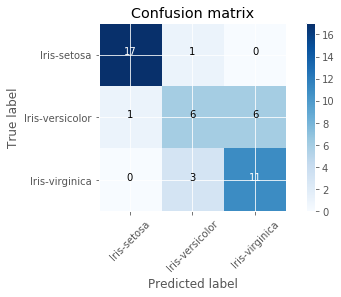

In [42]:
#先執行最下方plot_confusion_matrix官網作圖
import itertools
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plot_confusion_matrix(cnf_matrix, classes=target_names, title='Confusion matrix')
plt.show()

# Classification report

In [43]:
#印出分類效果評估報告
from sklearn.metrics import classification_report
print(classification_report(y_test, lr.predict(X_test_nor), target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       0.94      0.94      0.94        18
Iris-versicolor       0.60      0.46      0.52        13
 Iris-virginica       0.65      0.79      0.71        14

      micro avg       0.76      0.76      0.76        45
      macro avg       0.73      0.73      0.73        45
   weighted avg       0.75      0.76      0.75        45



In [46]:
#test data 最後的分類精確度precision不錯

# Confusion Metrics（from sklearn官網）

In [41]:
#備註
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#Source code from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py